# PREPROCESS FACE IMAGES

In [2]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
print ("PACKAGES LOADED")

PACKAGES LOADED


# LOAD IMAGES FROM THE FOLDER

In [3]:
# CURRENT FOLDER
cwd = os.getcwd() 
# RELATIVE PATHS OF FOLDERS CONSTAINING IMAGES
paths = { "../img_dataset/celebs/Arnold_Schwarzenegger"
        , "../img_dataset/celebs/Junichiro_Koizumi"
        , "../img_dataset/celebs/Vladimir_Putin"
        , "../img_dataset/celebs/George_W_Bush"}

In [14]:
imgsize    = [48, 48];
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0 
rawimg     = []
rszimg     = []
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath   = os.path.join(path, f)
        currimg    = imread(fullpath)
        imgsmall   = imresize(currimg, [imgsize[0], imgsize[1]])/255.
        imgvec     = np.reshape(imgsmall, (1, -1))
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = imgvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, imgvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        rawimg.append(currimg)
        rszimg.append(imgsmall)        
        imgcnt = imgcnt + 1
print ("TOTAL %d IMAGES LOADED." % (imgcnt))

TOTAL 681 IMAGES LOADED.


# PLOT RAW AND RESIZED IMAGES

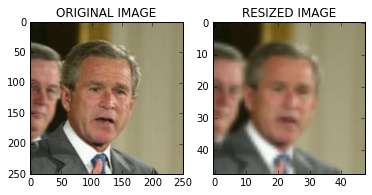

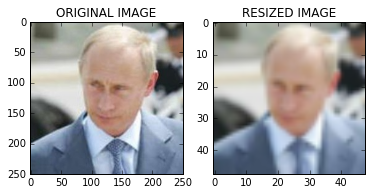

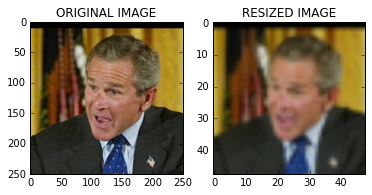

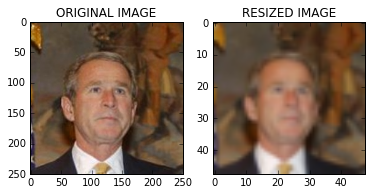

In [ ]:
for i in np.random.randint(imgcnt, size=5):
    plt.subplot(1, 2, 1)
    plt.imshow(rawimg[i])
    plt.title("ORIGINAL IMAGE")
    plt.subplot(1, 2, 2)
    plt.imshow(rszimg[i])
    plt.title("RESIZED IMAGE")
    plt.show()

# DIVIDE IMAGES INTO TRAIN AND TEST SETS

In [4]:
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(4*imgcnt/5)]
testidx    = randidx[int(4*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]

print("%d TRAIN AND %d TEST IMAGES" % (len(trainidx), len(testidx)))
print("EACH IAMGE IS (%d, %d, 3) = %d-DIMENSINOAL VECTOR" 
      % (imgsize[0], imgsize[1], trainimg.shape[0]))

544 TRAIN AND 137 TEST IMAGES
EACH IAMGE IS (48, 48, 3) = 544-DIMENSINOAL VECTOR


# SAVE IAMGES AND LABELS TO 'DATA.NPZ'

In [5]:
savepath = cwd + "/data.npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel, imgsize=imgsize)
print ("DATA SAVED TO %s" % (savepath))

DATA SAVED TO /home/ksc2016/Sungjoon/data.npz


# PLOT IMAGES

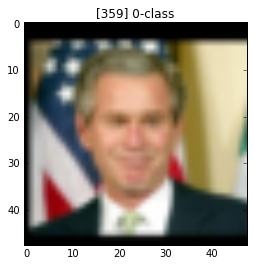

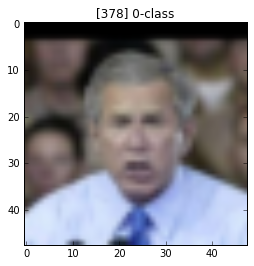

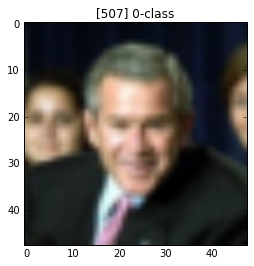

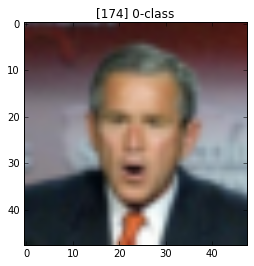

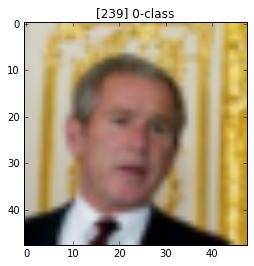

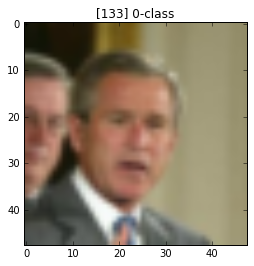

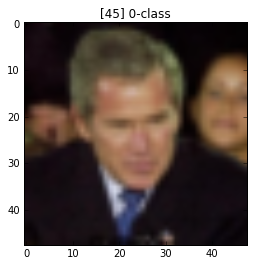

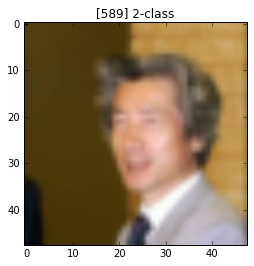

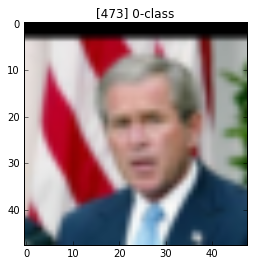

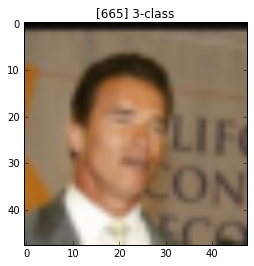

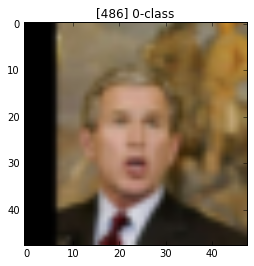

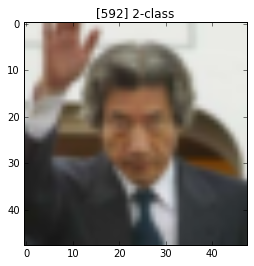

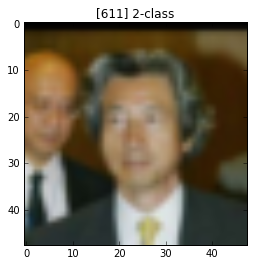

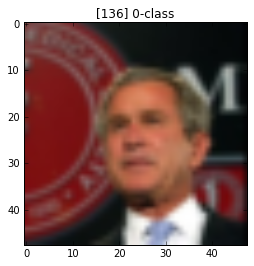

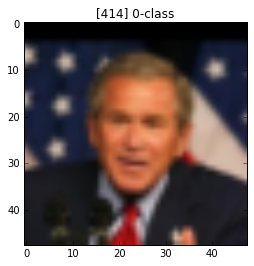

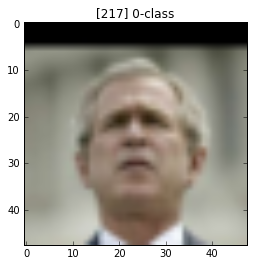

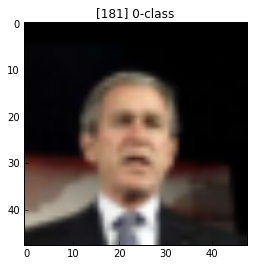

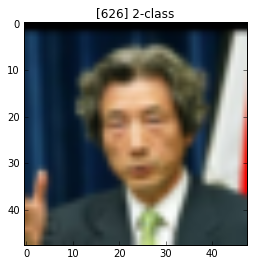

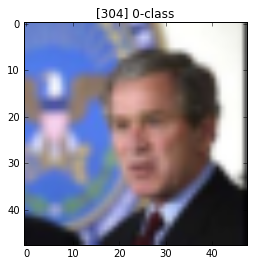

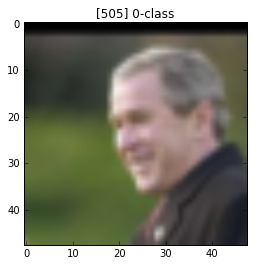

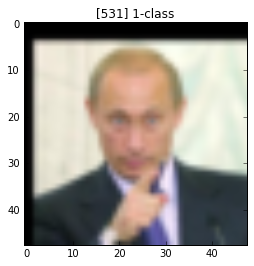

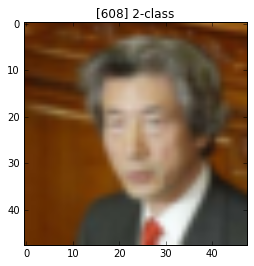

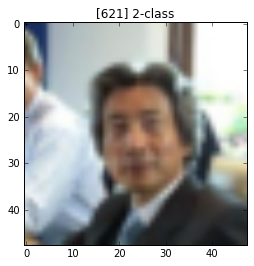

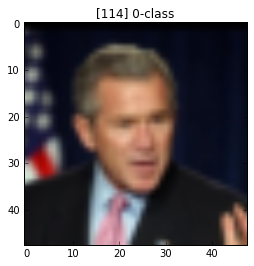

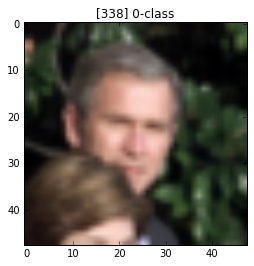

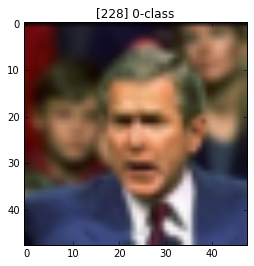

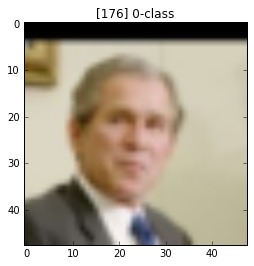

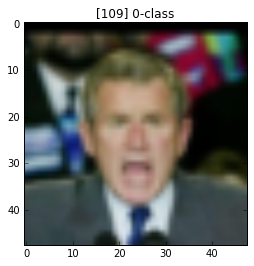

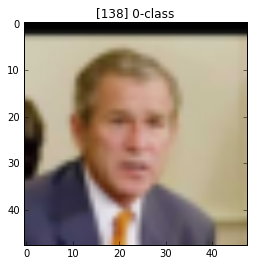

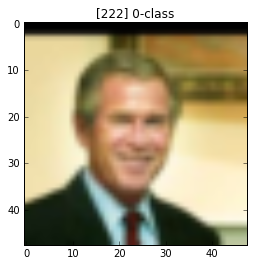

In [6]:
randidx = np.random.randint(imgcnt, size = 30)
for i in randidx: 
    currimg = np.reshape(totalimg[i, :], (imgsize[0], -1))
    currlabel = np.argmax(totallabel[i, :]) 
    currimg = np.reshape(totalimg[i, :], (imgsize[0], imgsize[1], 3))
    plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show() 